In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import seaborn as sns
from sklearn.metrics import accuracy_score as asc

In [2]:
df_ori = pd.read_excel("ENB2012_data.xlsx")
Y1 = df_ori.iloc[:,8].values  # Y1 is heating load
Y2 = df_ori.iloc[:,9].values  # Y2 is cooling load
X = df_ori.iloc[:,[1, 2, 3, 4, 5, 6, 7]].values 

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889430,0.895785
X6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
X7,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-0.002587,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


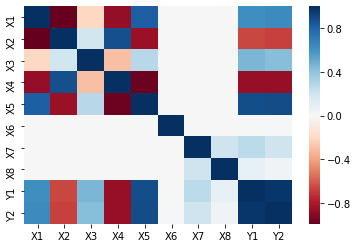

In [3]:
corrmat = df_ori.corr()
# to find the correlation matrix for features only
display(corrmat)

# also we can find the heatmap to get better visual idea
sns.heatmap(corrmat, xticklabels = corrmat.columns, yticklabels = corrmat.columns, cmap = 'RdBu')

# Knocking out 10% of the data

In [4]:
# we have used if else loop to avoid further knocking if it is alraedy done once
if df_ori['X1'].isnull().sum() == 0:
    for i in range(1,9):
        df_ori[f'X{i}'] = df_ori[f'X{i}'].sample(frac = 0.9)
else:
    print("knocking already done")

## Creating a knocked data .csv file

In [5]:
df_ori.to_csv('knocked_data1.csv',sep=',', index = False, mode = 'w', header = True)

# Imputation of X1

In [6]:
multi_reg_df = pd.read_csv("knocked_data.csv")
multi_reg_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,NaN,110.25,7.0,4.0,0.0,NaN,15.55,21.33
3,0.98,514.5,294.0,NaN,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,NaN,7.0,2.0,0.0,0.0,20.84,28.28


### 1) Data imputation using multiple linear regression

In [7]:
# importing libraries
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# Drop all the rows having null values to form X_train,y_train
X_lr = multi_reg_df.drop(['X3','X4','X5','X6','X7','X8','Y2'],axis=1)
pure_X = X_lr.dropna()
X_train = pure_X.drop('X1',axis=1)
y_train = pure_X.X1

#Take those rows having X1 valus as null
X_test = X_lr[X_lr['X1'].isnull()].drop('X1',axis=1)

# For now fill the NA values of X2 in X_test by mean of X2
X_test_fill = X_test.fillna(X_test.mean()['X2'])

In [8]:
# Fit the model
regr_lr = linear_model.LinearRegression()
regr_lr.fit(X_train,y_train)
X_train = sm.add_constant(X_train)
regr_lr2 = sm.OLS(y_train,X_train)
model_lr = regr_lr2.fit()
print(model_lr.summary())

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                     X1   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 2.071e+04
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        08:02:34   Log-Likelihood:                 1806.4
No. Observations:                 616   AIC:                            -3607.
Df Residuals:                     613   BIC:                            -3593.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6101      0.006    257.906      0.0

In [9]:
# Predict the values of X1 from model after feature engineering
predicted_X1 = regr_lr.predict(X_test_fill)
X_lr.X1[X_lr.X1.isnull()]= predicted_X1

In [10]:
from sklearn.metrics import r2_score
df1 = pd.read_excel('ENB2012_data.xlsx')
r2_score(df1.X1,X_lr.X1)


0.9975611332705464

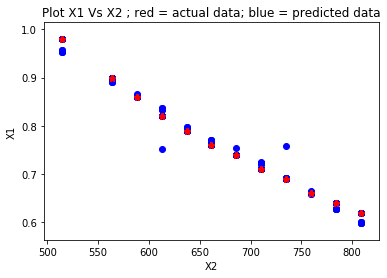

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df1.X2,X_lr.X1,color='blue',marker='o')
plt.scatter(df1.X2,df1.X1,color='red',marker='*')
plt.xlabel('X2')
plt.ylabel('X1')
plt.title('Plot X1 Vs X2 ; red = actual data; blue = predicted data')
plt.show()

In [12]:
df_ori = pd.read_excel("ENB2012_data.xlsx")

X1_ori = df_ori.iloc[:,0].values

df_rest_features_ori = df_ori.drop('X1', axis = 1)

df_rest_features_ori.to_csv('X1_after_imputation_lr.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X1_after_imputation_lr.csv")
X1_new = X_lr.X1

df_new_read['X1'] = X1_new

df_new_read.to_csv('X1_after_imputation_lr.csv', index = False, mode = 'w', header = True)


### 2) Data imputation of X1 using Decision Tree Regressor 

In [13]:
X_dt = multi_reg_df.drop(['X4','X5','X6','X7','X3','X8'],axis=1)
X1=X_dt.dropna()
X_train = X1.drop('X1',axis=1)
Y_train = X1['X1']
X_test = X_dt[X_dt['X1'].isnull()].drop('X1',axis=1)
X_test_fill = X_test.fillna(X_test.mean()['X2'])


In [14]:
from sklearn.tree import DecisionTreeRegressor
regr_dt = DecisionTreeRegressor(random_state=0)
regr_dt.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [15]:
predicted_X1 = regr_dt.predict(X_test_fill)

In [16]:
X_dt.X1[X_dt.X1.isnull()]= predicted_X1

In [17]:
from sklearn.metrics import r2_score
df1 = pd.read_excel('ENB2012_data.xlsx')
r2_score(df1.X1,X_dt.X1)

0.9989629295879684

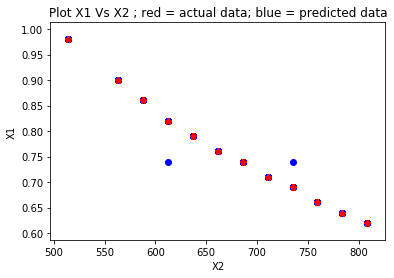

In [18]:
import matplotlib.pyplot as plt
plt.scatter(df1.X2,X_dt.X1,color='blue',marker='o')
plt.scatter(df1.X2,df1.X1,color='red',marker='*')
plt.xlabel('X2')
plt.ylabel('X1')
plt.title('Plot X1 Vs X2 ; red = actual data; blue = predicted data')
plt.show()

In [19]:

df_rest_features_ori.to_csv('X1_after_imputation_dt.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X1_after_imputation_dt.csv")
X1_new = X_dt.X1

df_new_read['X1'] = X1_new

df_new_read.to_csv('X1_after_imputation_dt.csv', index = False, mode = 'w', header = True)


### 3) Data imputation of X1 using KNN Regressor 

In [20]:
X_knn = multi_reg_df.drop(['X4','X5','X6','X7','X3','X8'],axis=1)
X1=X_knn.dropna()
X_train = X1.drop('X1',axis=1)
Y_train = X1['X1']
X_test = X_knn[X_knn['X1'].isnull()].drop('X1',axis=1)
X_test_fill = X_test.fillna(X_test.mean()['X2'])

In [21]:
# import the libraries
from sklearn.neighbors import KNeighborsRegressor


# Fit the model
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, Y_train)

# Predict new X4 values from KNN
predicted_X1_values = neigh.predict(X_test_fill)


In [22]:
X_knn.X1[X_knn.X1.isnull()]= predicted_X1_values
r2_score(df1.X1,X_knn.X1)

0.9989629295879684

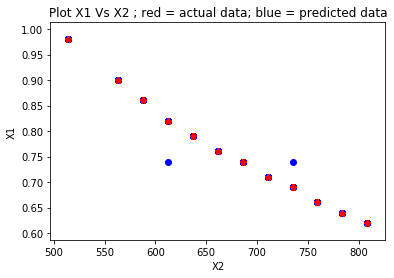

In [23]:
import matplotlib.pyplot as plt
plt.scatter(df1.X2,X_knn.X1,color='blue',marker='o')
plt.scatter(df1.X2,df1.X1,color='red',marker='*')
plt.xlabel('X2')
plt.ylabel('X1')
plt.title('Plot X1 Vs X2 ; red = actual data; blue = predicted data')
plt.show()

In [24]:
df_rest_features_ori.to_csv('X1_after_imputation_knn.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X1_after_imputation_knn.csv")
X1_new = X_knn.X1

df_new_read['X1'] = X1_new

df_new_read.to_csv('X1_after_imputation_knn.csv', index = False, mode = 'w', header = True)


### 4) Data imputation of X1 using Random Forest Regressor

In [25]:
X_rf = multi_reg_df.drop(['X4','X5','X6','X7','X3','X8'],axis=1)
X1=X_rf.dropna()
X_train = X1.drop('X1',axis=1)
Y_train = X1['X1']
X_test = X_rf[X_rf['X1'].isnull()].drop('X1',axis=1)
X_test_fill = X_test.fillna(X_test.mean()['X2'])



In [26]:
from sklearn.ensemble import RandomForestRegressor
regr_rf = RandomForestRegressor()
regr_rf.fit(X_train,Y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [27]:
predicted_X1 = regr_rf.predict(X_test_fill)

In [28]:
X_rf.X1[X_rf.X1.isnull()]= predicted_X1
r2_score(df1.X1,X_rf.X1)

0.9991698775713131

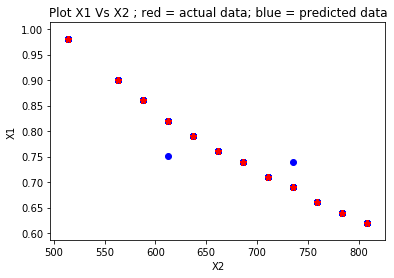

In [29]:
import matplotlib.pyplot as plt
plt.scatter(df1.X2,X_rf.X1,color='blue',marker='o')
plt.scatter(df1.X2,df1.X1,color='red',marker='*')
plt.xlabel('X2')
plt.ylabel('X1')
plt.title('Plot X1 Vs X2 ; red = actual data; blue = predicted data')
plt.show()

In [30]:
df_rest_features_ori.to_csv('X1_after_imputation_rf.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X1_after_imputation_rf.csv")
X1_new = X_rf.X1

df_new_read['X1'] = X1_new

df_new_read.to_csv('X1_after_imputation_rf.csv', index = False, mode = 'w', header = True)


In [31]:
df_ori = pd.read_csv("knocked_data.csv")

df_rest_features_ori = df_ori.drop('X1', axis = 1)

df_rest_features_ori.to_csv('X1_after_imputation_finl_rf.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X1_after_imputation_finl_rf.csv")
X1_new = X_rf.X1

df_new_read['X1'] = X1_new

df_new_read.to_csv('X1_after_imputation_finl_rf.csv', index = False, mode = 'w', header = True)


# Imputation of X2 using  modified X1 

### 1) by linear regression

In [32]:
X1_knn = pd.read_csv('X1_after_imputation_finl_rf.csv')
X_lr = X1_knn.drop(['X3','X4','X5','X6','X7','X8','Y2'],axis=1)
pure_X = X_lr.dropna()
X_train = pure_X.drop('X2',axis=1)
y_train = pure_X.X2

#Take those rows having X1 valus as null
X_test = X_lr[X_lr['X2'].isnull()].drop('X2',axis=1)
regr_lr1 = linear_model.LinearRegression()
regr_lr1.fit(X_train,y_train)
regr_lr2 = sm.OLS(y_train,X_train)
model_lr = regr_lr2.fit()
print(model_lr.summary())
predicted_X2 = regr_lr1.predict(X_test)
X_lr.X2[X_lr.X2.isnull()]= predicted_X2

                                 OLS Regression Results                                
Dep. Variable:                     X2   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              5344.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):                        0.00
Time:                        08:02:41   Log-Likelihood:                         -4516.9
No. Observations:                 691   AIC:                                      9038.
Df Residuals:                     689   BIC:                                      9047.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [33]:
r2_score(df1.X2,X_lr.X2)

0.9977930104453551

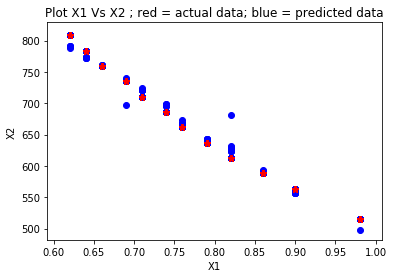

In [34]:
import matplotlib.pyplot as plt
plt.scatter(df1.X1,X_lr.X2,color='blue',marker='o')
plt.scatter(df1.X1,df1.X2,color='red',marker='*')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Plot X1 Vs X2 ; red = actual data; blue = predicted data')
plt.show()

In [35]:
df2=pd.read_csv('X1_after_imputation_rf.csv')

df_rest_features_ori = df2.drop('X2', axis = 1)

df_rest_features_ori.to_csv('X2_after_imputation_lr_with_X1_rf.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X2_after_imputation_lr_with_X1_rf.csv")
X2_new = X_lr.X2

df_new_read['X2'] = X2_new

df_new_read.to_csv('X2_after_imputation_lr_with_X1_rf.csv', index = False, mode = 'w', header = True)


### 2) X2 by Dt

In [36]:
X_dt = X1_knn.drop(['X3','X4','X5','X6','X7','X8','Y2'],axis=1)
pure_X = X_dt.dropna()
X_train = pure_X.drop('X2',axis=1)
y_train = pure_X.X2

#Take those rows having X1 valus as null
X_test = X_dt[X_dt['X2'].isnull()].drop('X2',axis=1)

In [37]:
from sklearn.tree import DecisionTreeRegressor
regr_dt = DecisionTreeRegressor(random_state=0)
regr_dt.fit(X_train, y_train)
predicted_X2 = regr_dt.predict(X_test)
X_dt.X2[X_dt.X2.isnull()]= predicted_X2

In [38]:
r2_score(df1.X2,X_dt.X2)

0.99919311457773

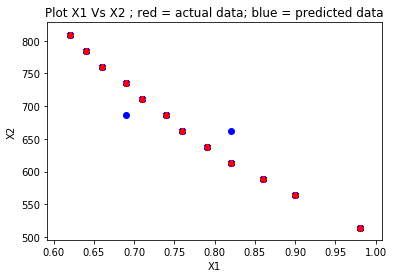

In [39]:
import matplotlib.pyplot as plt
plt.scatter(df1.X1,X_dt.X2,color='blue',marker='o')
plt.scatter(df1.X1,df1.X2,color='red',marker='*')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Plot X1 Vs X2 ; red = actual data; blue = predicted data')
plt.show()

In [40]:
df_rest_features_ori.to_csv('X2_after_imputation_dt_with_X1_rf.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X2_after_imputation_dt_with_X1_rf.csv")
X2_new = X_dt.X2

df_new_read['X2'] = X2_new

df_new_read.to_csv('X2_after_imputation_dt_with_X1_rf.csv', index = False, mode = 'w', header = True)


### 3) X2 by random forest

In [41]:
X_rf = X1_knn.drop(['X3','X4','X5','X6','X7','X8','Y2'],axis=1)
pure_X = X_rf.dropna()
X_train = pure_X.drop('X2',axis=1)
y_train = pure_X.X2

#Take those rows having X1 valus as null
X_test = X_rf[X_rf['X2'].isnull()].drop('X2',axis=1)

In [42]:
from sklearn.ensemble import RandomForestRegressor
regr_rf = RandomForestRegressor()
regr_rf.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [43]:
predicted_X2 = regr_rf.predict(X_test)
X_rf.X2[X_rf.X2.isnull()]= predicted_X2

In [44]:
r2_score(df1.X2,X_rf.X2)

0.99919311457773

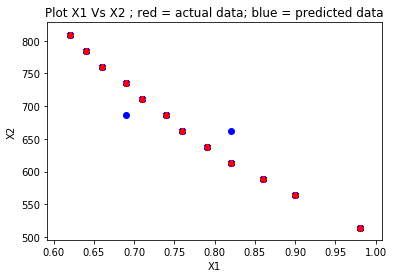

In [45]:
import matplotlib.pyplot as plt
plt.scatter(df1.X1,X_rf.X2,color='blue',marker='o')
plt.scatter(df1.X1,df1.X2,color='red',marker='*')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Plot X1 Vs X2 ; red = actual data; blue = predicted data')
plt.show()

In [46]:
df_rest_features_ori.to_csv('X2_after_imputation_rf_with_X1_rf.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X2_after_imputation_rf_with_X1_rf.csv")
X2_new = X_rf.X2

df_new_read['X2'] = X2_new

df_new_read.to_csv('X2_after_imputation_rf_with_X1_rf.csv', index = False, mode = 'w', header = True)


### 4) X2 by KNN

In [47]:
X_knn = X1_knn.drop(['X4','X5','X6','X7','X3','X8'],axis=1)
X1=X_knn.dropna()
X_train = X1.drop('X2',axis=1)
Y_train = X1['X2']
X_test = X_knn[X_knn['X2'].isnull()].drop('X2',axis=1)

In [48]:
# import the libraries
from sklearn.neighbors import KNeighborsRegressor


# Fit the model
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, Y_train)

# Predict new X4 values from KNN
predicted_X2_values = neigh.predict(X_test)


In [49]:
X_knn.X2[X_knn.X2.isnull()]= predicted_X2_values
r2_score(df1.X2,X_knn.X2)

0.9879128563743949

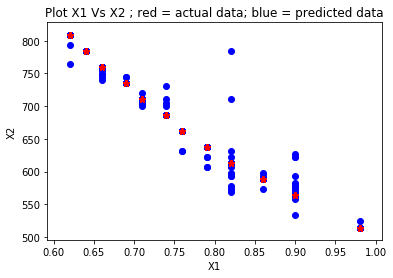

In [50]:
import matplotlib.pyplot as plt
plt.scatter(df1.X1,X_knn.X2,color='blue',marker='o')
plt.scatter(df1.X1,df1.X2,color='red',marker='*')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Plot X1 Vs X2 ; red = actual data; blue = predicted data')
plt.show()

In [51]:
df_rest_features_ori.to_csv('X2_after_imputation_knn_with_X1_rf.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X2_after_imputation_knn_with_X1_rf.csv")
X2_new = X_knn.X2

df_new_read['X2'] = X2_new

df_new_read.to_csv('X2_after_imputation_knn_with_X1_rf.csv', index = False, mode = 'w', header = True)


In [52]:
df_ori = pd.read_csv("X1_after_imputation_finl_rf.csv")

df_rest_features_ori = df_ori.drop('X2', axis = 1)

df_rest_features_ori.to_csv('X2_after_imputation_finl_rf.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X2_after_imputation_finl_rf.csv")
X2_new = X_rf.X2

df_new_read['X2'] = X2_new

df_new_read.to_csv('X2_after_imputation_finl_rf.csv', index = False, mode = 'w', header = True)


# Imputation of X5 using X1_rf, X2_rf, Y1, Y2

### 1) using KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

# Made a new dataframe for correlated features 
X5_df = pd.read_csv('X2_after_imputation_finl_rf.csv')
X5_knn = X5_df.drop(['X3','X6','X7','X8'],axis=1)

# Drop all the NaN values row so to create train set
pure_knn_df=X5_knn.dropna()
knn_X_train= pure_knn_df.drop('X5',axis=1)
knn_y_train = pure_knn_df.X5

# Take the rows in which X5 has NaN values
knn_X_test = X5_knn[X5_knn['X5'].isnull()].drop('X5',axis=1)

# Filling the NA values of X4 by its mode
M4= knn_X_test.mode()['X4']
knn_X_test_fill = knn_X_test.fillna(np.array(M4)[0])

In [54]:
# Label the data in X5
lab_enc = preprocessing.LabelEncoder()
encoded_knn_y_train = lab_enc.fit_transform(knn_y_train)

# Train KNN learner
clf = KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='auto',leaf_size=30,p=2,metric='minkowski',
                           metric_params=None,n_jobs=None)
knn_trained_model = clf.fit(knn_X_train, encoded_knn_y_train)
encoded_predicted_X5_values = knn_trained_model.predict(knn_X_test_fill)

# Decode the the binary values in X5 
predicted_X5_values = lab_enc.inverse_transform(encoded_predicted_X5_values)

# Predict missing values' class
X5_knn.X5[X5_knn.X5.isnull()]= predicted_X5_values

# Compare with original values of X5 by using confusion matrix
encoded_df1_X5 = lab_enc.fit_transform(df1.X5)
encoded_X5_knn_X5 = lab_enc.fit_transform(X5_knn.X5)
print(confusion_matrix(encoded_df1_X5,encoded_X5_knn_X5))


# Finding the model accuracy by original data
new_X_train = df1.drop(['X3','X6','X7','X8','X5'],axis=1)

[[384   0]
 [  1 383]]


In [55]:
print(asc(encoded_df1_X5,encoded_X5_knn_X5))

0.9986979166666666


In [56]:
df3=pd.read_csv('X2_after_imputation_rf_with_X1_rf.csv')

df_rest_features_ori = df3.drop('X5', axis = 1)
df_rest_features_ori.to_csv('X5_after_imputation_knn.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X5_after_imputation_knn.csv")
X5_new = X5_knn.X5

df_new_read['X5'] = X5_new

df_new_read.to_csv('X5_after_imputation_knn.csv', index = False, mode = 'w', header = True)


In [57]:
df_ori = pd.read_csv("X2_after_imputation_finl_rf.csv")

df_rest_features_ori = df_ori.drop('X5', axis = 1)

df_rest_features_ori.to_csv('X5_after_imputation_finl_knn.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X5_after_imputation_finl_knn.csv")
X5_new = X5_knn.X5

df_new_read['X5'] = X5_new

df_new_read.to_csv('X5_after_imputation_finl_knn.csv', index = False, mode = 'w', header = True)


### 2) using logistic regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
X5_lr= X5_df.drop(['X3','X6','X7','X8'],axis=1)
log_X_train = knn_X_train
log_y_train = encoded_knn_y_train
log_X_test = knn_X_test_fill
logmodel = LogisticRegression()
logmodel.fit(log_X_train,log_y_train)


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
predicted_X5_values = logmodel.predict(log_X_test)
predicted_X5_values_lr = lab_enc.inverse_transform(predicted_X5_values)


In [60]:
X5_lr.X5[X5_lr.X5.isnull()]= predicted_X5_values_lr
encoded_X5_lr_X5 = lab_enc.fit_transform(X5_lr.X5)
print(confusion_matrix(encoded_df1_X5,encoded_X5_lr_X5))

[[384   0]
 [  5 379]]


In [61]:
print(asc(encoded_df1_X5,encoded_X5_lr_X5))

0.9934895833333334


In [62]:
df_rest_features_ori.to_csv('X5_after_imputation_lr.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X5_after_imputation_lr.csv")
X5_new = X5_lr.X5

df_new_read['X5'] = X5_new

df_new_read.to_csv('X5_after_imputation_lr.csv', index = False, mode = 'w', header = True)


# Imputation of X4 after X1_rf, X2_rf, X5_knn, Y1, Y2

### by KNN

In [63]:
# import the libraries
from sklearn.neighbors import KNeighborsRegressor

# Saperate the required columns
X4_df = pd.read_csv('X5_after_imputation_finl_knn.csv')
knn_df_x4=X4_df.drop(['X3','X6','X7','X8'],axis=1)

# Drop all the NaN values row so to create train set
knn_df_x4_pure = knn_df_x4.dropna()
x4_X_train = knn_df_x4_pure.drop('X4',axis=1)
x4_y_train = knn_df_x4_pure.X4

# Take the rows in which X4 has NaN values
x4_X_test =  knn_df_x4[knn_df_x4['X4'].isnull()].drop('X4',axis=1)

# Fit the model
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x4_X_train, x4_y_train)

# Predict new X4 values from KNN
predicted_X4_values = neigh.predict(x4_X_test)

# Fill the NaN values in X4 column in given data
knn_df_x4.X4[knn_df_x4.X4.isnull()]= predicted_X4_values

# Compare with original data

r2_score(df1.X4,knn_df_x4.X4)

0.9999846547314578

In [64]:
df4=pd.read_csv('X5_after_imputation_knn.csv')

df_rest_features_ori = df4.drop('X4', axis = 1)
df_rest_features_ori.to_csv('X4_after_imputation_knn.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X4_after_imputation_knn.csv")
X4_new = knn_df_x4.X4

df_new_read['X4'] = X4_new

df_new_read.to_csv('X4_after_imputation_knn.csv', index = False, mode = 'w', header = True)


In [65]:
df_ori = pd.read_csv("X5_after_imputation_finl_knn.csv")

df_rest_features_ori = df_ori.drop('X4', axis = 1)

df_rest_features_ori.to_csv('X4_after_imputation_finl_knn.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X4_after_imputation_finl_knn.csv")
X4_new = knn_df_x4.X4

df_new_read['X4'] = X4_new

df_new_read.to_csv('X4_after_imputation_finl_knn.csv', index = False, mode = 'w', header = True)


# Imptation of X7 using X1, X2, X4, X5, Y1, Y2

### 1) using MLR

In [66]:
X7_df = pd.read_csv("X4_after_imputation_finl_knn.csv")

In [67]:
X7_mlr = X7_df.drop(['X3','X6','X8'],axis = 1)
X7_mlr_pure = X7_mlr.dropna()
X_train = X7_mlr_pure.drop('X7',axis = 1)
y_train1 = X7_mlr_pure.drop(['X1','X2','X4','X5','Y1','Y2'],axis = 1)
y_train = y_train1.X7*X7_mlr_pure.X4
X_test = X7_mlr[X7_mlr['X7'].isnull()].drop('X7',axis=1)


In [68]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
RX = sm.add_constant(X_train)
model = sm.OLS(y_train,RX)
est = model.fit()
print(est.summary())

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     104.7
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           2.25e-93
Time:                        08:02:50   Log-Likelihood:                -3026.6
No. Observations:                 691   AIC:                             6067.
Df Residuals:                     684   BIC:                             6099.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -316.7511    130.713     -2.423      0.0

In [69]:
X7_mlr_predict1 = regression_model.predict(X_test)
X7_mlr_predict = X7_mlr_predict1/X_test.X4
X7_mlr.X7[X7_mlr.X7.isnull()]= X7_mlr_predict

In [70]:
r2_score(df1.X7, X7_mlr.X7)

0.9430113092504228

### 2) Using KNN Regressor

In [71]:
X7_knn = X7_df.drop(['X3','X6','X8'],axis = 1)
X7_knn_pure = X7_knn.dropna()
X_train = X7_knn_pure.drop('X7',axis = 1)
y_train1 = X7_knn_pure.drop(['X1','X2','X4','X5','Y1','Y2'],axis = 1)
y_train = y_train1.X7*X7_knn_pure.X4
X_test = X7_knn[X7_knn['X7'].isnull()].drop('X7',axis=1)


In [72]:
# Fit the model
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [73]:
# Predict new X7 values from KNN

X7_knn_predict1 = neigh.predict(X_test)
X7_knn_predict = X7_knn_predict1/X_test.X4

In [74]:
# Fill the NaN values in X7 column in given data
X7_knn.X7[X7_knn.X7.isnull()]= X7_knn_predict

In [75]:
r2_score(df1.X7, X7_knn.X7)

0.9986850321395776

In [76]:
df7=pd.read_csv('X4_after_imputation_knn.csv')

df_rest_features_ori = df7.drop('X7', axis = 1)
df_rest_features_ori.to_csv('X7_after_imputation_knn.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X7_after_imputation_knn.csv")
X7_new = X7_knn.X7

df_new_read['X7'] = X7_new

df_new_read.to_csv('X7_after_imputation_knn.csv', index = False, mode = 'w', header = True)

### 3) Using KNN Classifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

# Made a new dataframe for correlated features 

X7_knncl = X7_df.drop(['X3','X6','X8'],axis=1)

# Drop all the NaN values row so to create train set
pure_knn_df=X7_knncl.dropna()
knn_X_train= pure_knn_df.drop('X7',axis=1)
knn_y_train = pure_knn_df.X7

# Take the rows in which X5 has NaN values
knn_X_test = X7_knncl[X7_knncl['X7'].isnull()].drop('X7',axis=1)


In [78]:
# Label the data in X5
lab_enc = preprocessing.LabelEncoder()
encoded_knn_y_train = lab_enc.fit_transform(knn_y_train)

# Train KNN learner
clf = KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='auto',leaf_size=30,p=2,metric='minkowski',
                           metric_params=None,n_jobs=None)
knn_trained_model = clf.fit(knn_X_train, encoded_knn_y_train)
encoded_predicted_X7_values = knn_trained_model.predict(knn_X_test)

# Decode the the binary values in X5 
predicted_X7_values = lab_enc.inverse_transform(encoded_predicted_X7_values)

# Predict missing values' class
X7_knncl.X7[X7_knncl.X7.isnull()]= predicted_X7_values

# Compare with original values of X5 by using confusion matrix
encoded_df1_X7 = lab_enc.fit_transform(df1.X7)
encoded_X7_knn_X7 = lab_enc.fit_transform(X7_knncl.X7)
print(confusion_matrix(encoded_df1_X7,encoded_X7_knn_X7))


[[ 48   0   0   0]
 [  0 240   0   0]
 [  0   0 240   0]
 [  0   0   0 240]]


In [79]:
df_rest_features_ori = df7.drop('X7', axis = 1)
df_rest_features_ori.to_csv('X7_after_imputation_knncl.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X7_after_imputation_knncl.csv")
X7_new = X7_knncl.X7

df_new_read['X7'] = X7_new

df_new_read.to_csv('X7_after_imputation_knncl.csv', index = False, mode = 'w', header = True)

In [80]:
df_ori = pd.read_csv("X4_after_imputation_finl_knn.csv")

df_rest_features_ori = df_ori.drop('X7', axis = 1)

df_rest_features_ori.to_csv('X7_after_imputation_finl_knn.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X7_after_imputation_finl_knn.csv")
X7_new = X7_knncl.X7

df_new_read['X7'] = X7_new

df_new_read.to_csv('X7_after_imputation_finl_knn.csv', index = False, mode = 'w', header = True)


## Imputation of X3

## 1) X3 by using linear regression

In [81]:
X3_df = pd.read_csv("X7_after_imputation_finl_knn.csv")

In [82]:
X3_mlr = X3_df.drop(['X6','X8'],axis = 1)
X3_mlr_pure = X3_mlr.dropna()
X_train = X3_mlr_pure.drop('X3',axis = 1)
y_train = X3_mlr_pure.X3
X_test = X3_mlr[X3_mlr['X3'].isnull()].drop('X3',axis=1)


In [83]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
RX = sm.add_constant(X_train)
model = sm.OLS(y_train,RX)
est = model.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                     X3   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.661e+04
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        08:02:53   Log-Likelihood:                -1652.2
No. Observations:                 691   AIC:                             3320.
Df Residuals:                     683   BIC:                             3357.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5425     17.854      0.198      0.8

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [84]:
X3_mlr_predict = regression_model.predict(X_test)
X3_mlr.X3[X3_mlr.X3.isnull()]= X3_mlr_predict

In [85]:
r2_score(df1.X3, X3_mlr.X3)

0.9999948541905687

In [86]:
df3=pd.read_csv('X7_after_imputation_knncl.csv')

df_rest_features_ori = df3.drop('X3', axis = 1)
df_rest_features_ori.to_csv('X3_after_imputation_mlr.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X3_after_imputation_mlr.csv")
X3_new = X3_mlr.X3

df_new_read['X3'] = X3_new

df_new_read.to_csv('X3_after_imputation_mlr.csv', index = False, mode = 'w', header = True)

## 2) X3 by Decision trees

In [87]:
X3_dt = X3_df.drop(['X6','X8'],axis = 1)
X3_dt_pure = X3_dt.dropna()
X_train = X3_dt_pure.drop('X3',axis = 1)
y_train = X3_dt_pure.X3
X_test = X3_dt[X3_dt['X3'].isnull()].drop('X3',axis=1)

In [88]:
from sklearn.tree import DecisionTreeRegressor
regr_dt = DecisionTreeRegressor(random_state=0)
regr_dt.fit(X_train, y_train)
predicted_X3 = regr_dt.predict(X_test)
X3_dt.X3[X3_dt.X3.isnull()]= predicted_X3

In [89]:
r2_score(df1.X3,X3_dt.X3)

1.0

In [90]:
df_rest_features_ori.to_csv('X3_after_imputation_dt.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X3_after_imputation_dt.csv")
X3_new = X3_dt.X3

df_new_read['X3'] = X3_new

df_new_read.to_csv('X3_after_imputation_dt.csv', index = False, mode = 'w', header = True)

## 3) X3 by KNN

In [95]:
# import the libraries
from sklearn.neighbors import KNeighborsRegressor

X3_knn = X3_df.drop(['X6','X8'],axis = 1)
X3_knn_pure = X3_knn.dropna()
X_train = X3_knn_pure.drop('X3',axis = 1)
y_train = X3_knn_pure.X3
X_test = X3_knn[X3_knn['X3'].isnull()].drop('X3',axis=1)

# Fit the model
neigh = KNeighborsRegressor(n_neighbors=i+1)
neigh.fit(X_train, y_train)

# Predict new X4 values from KNN
predicted_X3 = neigh.predict(X_test)

# Fill the NaN values in X4 column in given data
X3_knn.X3[X3_knn.X3.isnull()]= predicted_X3

# Compare with original data

r2_score(df1.X3,X3_knn.X3)
  

0.9999798976608187

In [96]:
df_rest_features_ori.to_csv('X3_after_imputation_knn.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X3_after_imputation_knn.csv")
X3_new = X3_knn.X3

df_new_read['X3'] = X3_new

df_new_read.to_csv('X3_after_imputation_knn.csv', index = False, mode = 'w', header = True)

In [97]:
df_ori = pd.read_csv("X7_after_imputation_finl_knn.csv")

df_rest_features_ori = df_ori.drop('X3', axis = 1)

df_rest_features_ori.to_csv('X3_after_imputation_finl_knn.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X3_after_imputation_finl_knn.csv")
X3_new = X3_knn.X3

df_new_read['X3'] = X3_new

df_new_read.to_csv('X3_after_imputation_finl_knn.csv', index = False, mode = 'w', header = True)


# Imputation of X6

### Making training and testing sets for X6

In [98]:
import numpy as np
import pandas as pd 
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as asc
from sklearn.metrics import r2_score as r2

df = pd.read_csv("knock_0.csv")

df.head()
X6_0 = df['X6']

X6_imp = X6_0.fillna(6)
X6_imp.to_csv('X6_imputation.csv',sep=',', index = False, mode = 'w', header = True)

df_imp = pd.read_csv("X6_imputation.csv")

Y1 = df.Y1
Y2 = df.Y2

df_imp['Y1'] = Y1
df_imp['Y2'] = Y2
df_imp.to_csv('X6_imputation.csv', index = False, mode = 'w', header = True)

df_imp6 = pd.read_csv("X6_imputation.csv")
X6 = df_imp6.iloc[:,0].values
y1 = df_imp6.iloc[:,1].values
y2 = df_imp6.iloc[:,2].values
x_train = []
x_test = []
y_test = []
y_train = []

for i in range(len(X6)):
    if X6[i] == 6:
        x_test.append(X6[i])
    else:
        x_train.append(X6[i])

x_test1 = np.array(x_test).reshape(1, 77)
x_train1 = np.array(x_train).reshape(1,691)
x_train = x_train1[0]

for i in range(len(X6)):
    c=[]
    if X6[i] == 6:
        Y1_val = y1[i]
        Y2_val = y2[i]
        c.append(Y1_val)
        c.append(Y2_val)
        y_test.append(c)
    else:
         Y1_val = y1[i]
         Y2_val = y2[i]
         c.append(Y1_val)
         c.append(Y2_val)
         y_train.append(c)

y_test = np.array(y_test)
y_train = np.array(y_train)

### 1) Using LDA using Y1 and Y2

In [99]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()

imputation_model_lda = lda.fit(y_train, x_train)

pred_lda = lda.predict(y_test)

count = 0
a = 0
for i in range(len(X6)):
    if X6[i] == 6:
        rep = pred_lda[count]
        X6[i] =  rep
        count = count + 1
    else:
        a = a+1

df_ori = pd.read_excel("ENB2012_data.xlsx")

X6_ori = df_ori.iloc[:,5].values



In [100]:
cm(df_ori.X6, X6)

array([[172,  13,   0,   7],
       [  0, 186,   0,   6],
       [  3,  11, 170,   8],
       [  3,   8,   0, 181]], dtype=int64)

In [101]:
asc(df_ori.X6, X6)

0.9231770833333334

In [102]:
# for model fitted data sets
asc(lda.predict(y_train), x_train)

0.2706222865412446

In [103]:
df_ori = pd.read_excel("ENB2012_data.xlsx")
y_ori = df_ori.drop(['X1','X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X7'], axis = 1)

In [104]:
# for original unknocked data
asc(lda.predict(y_ori), X6_ori)

0.2669270833333333

In [105]:
df_ori1 = pd.read_csv('X3_after_imputation_knn.csv')
df_rest_features_ori = df_ori1.drop('X6', axis = 1)

df_rest_features_ori.to_csv('X6_after_imputation_lda.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X6_after_imputation_lda.csv")
X6_new = X6

df_new_read['X6'] = X6_new

df_new_read.to_csv('X6_after_imputation_lda.csv', index = False, mode = 'w', header = True)

df_y = pd.read_csv("X6_after_imputation_lda.csv")
Y1 = df_ori.Y1
Y2 = df_ori.Y2

df_y['Y1'] = Y1
df_y['Y2'] = Y2
df_y.to_csv('X6_after_imputation_lda.csv', index = False, mode = 'w', header = True)

### 2) Using QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

qda = QDA()

imputation_model = qda.fit(y_train, x_train)

pred = qda.predict(y_test)

count = 0
a = 0
for i in range(len(X6)):
    if X6[i] == 6:
        rep = pred[count]
        X6[i] =  rep
        count = count + 1
    else:
        a = a+1

df_ori = pd.read_excel("ENB2012_data.xlsx")

X6_ori = df_ori.iloc[:,5].values

In [ ]:
cm(df_ori.X6, X6)

In [ ]:
asc(df_ori.X6, X6)

In [ ]:
r2( x_train, qda.predict(y_train))

In [ ]:
# for model fitted data sets
asc(qda.predict(y_train), x_train)

In [ ]:
# for original unknocked data
asc(qda.predict(y_ori), X6_ori)

In [ ]:
df_rest_features_ori = df_ori1.drop('X6', axis = 1)

df_rest_features_ori.to_csv('X6_after_imputation.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X6_after_imputation.csv")
X6_new = X6

df_new_read['X6'] = X6_new

df_new_read.to_csv('X6_after_imputation.csv', index = False, mode = 'w', header = True)

df_y = pd.read_csv("X6_after_imputation.csv")
Y1 = df_ori.Y1
Y2 = df_ori.Y2

df_y['Y1'] = Y1
df_y['Y2'] = Y2
df_y.to_csv('X6_after_imputation.csv', index = False, mode = 'w', header = True)


### 3) Using KNN classifier with optimum k

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_list = []
asc_list = []
df_ori = pd.read_excel("ENB2012_data.xlsx")
for i in range(30):
    df = pd.read_csv("knock_0.csv")
    X6_knncl = df.X6
    KN = KNeighborsClassifier(n_neighbors = i+1)
    KNN = KN.fit(y_train, x_train)
    pred_KNN = KNN.predict(y_test)
    X6_knncl[X6_knncl.isnull()]= pred_KNN
    count = 0
    a = 0    
    asc_val = asc(df_ori.X6, X6_knncl)
    asc_list.append(asc_val)
    k_list.append(i+1) 

In [ ]:
plt.scatter(k_list, asc_list)
plt.xlabel('K')
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")

In [ ]:
np.max(asc_list)

In [ ]:
asc_list.index(np.max(asc_list)) + 1

thus highest accuracy is for k = 1

### 4) Using ANN with 10 neurons in hidden layer and 5 hidden layer

we tried different values for number of hidden layers and number of neurons in each layer and found this combination to be most optimum

In [ ]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes = (10,10,10,10,10,), max_iter = 200, solver = 'lbfgs')

nn_5_2 = nn.fit(y_train, x_train)

pred_nn5 = nn_5_2.predict(y_test)

count = 0
a = 0
for i in range(len(X6)):
    if X6[i] == 6:
        rep = pred_nn5[count]
        X6[i] =  rep
        count = count + 1
    else:
        a = a+1

df_ori = pd.read_excel("ENB2012_data.xlsx")

X6_ori = df_ori.iloc[:,5].values


In [ ]:
cm(df_ori.X6, X6)

In [ ]:
asc(df_ori.X6, X6)

In [ ]:
# for model fitted data sets
asc(nn_5_2.predict(y_train), x_train)

In [ ]:
# for original unknocked data
asc(nn_5_2.predict(y_ori), X6_ori)

In [ ]:
df_rest_features_ori = df_ori1.drop('X6', axis = 1)

df_rest_features_ori.to_csv('X6_after_imputation_ANN5.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X6_after_imputation_ANN5.csv")
X6_new = X6

df_new_read['X6'] = X6_new

df_new_read.to_csv('X6_after_imputation_ANN5.csv', index = False, mode = 'w', header = True)

df_y = pd.read_csv("X6_after_imputation_ANN5.csv")
Y1 = df_ori.Y1
Y2 = df_ori.Y2

df_y['Y1'] = Y1
df_y['Y2'] = Y2
df_y.to_csv('X6_after_imputation_ANN5.csv', index = False, mode = 'w', header = True)

### 5) Using Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

dt_model = dt.fit(y_train,x_train)

pred_dt = dt_model.predict(y_test)

count = 0
a = 0
for i in range(len(X6)):
    if X6[i] == 6:
        rep = pred_dt[count]
        X6[i] =  rep
        count = count + 1
    else:
        a = a+1

df_ori = pd.read_excel("ENB2012_data.xlsx")

X6_ori = df_ori.iloc[:,5].values

In [ ]:
cm(df_ori.X6, X6)

In [ ]:
asc(df_ori.X6, X6)

In [ ]:
# for model fitted data sets
asc(dt_model.predict(y_train), x_train)

In [ ]:
# for original unknocked data
asc(dt_model.predict(y_ori), X6_ori)

In [ ]:
df_rest_features_ori = df_ori1.drop('X6', axis = 1)

df_rest_features_ori.to_csv('X6_after_imputation_Dt.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X6_after_imputation_Dt.csv")
X6_new = X6

df_new_read['X6'] = X6_new

df_new_read.to_csv('X6_after_imputation_Dt.csv', index = False, mode = 'w', header = True)

df_y = pd.read_csv("X6_after_imputation_Dt.csv")
Y1 = df_ori.Y1
Y2 = df_ori.Y2

df_y['Y1'] = Y1
df_y['Y2'] = Y2
df_y.to_csv('X6_after_imputation_Dt.csv', index = False, mode = 'w', header = True)

In [ ]:
df_ori = pd.read_csv("X3_after_imputation_finl_knn.csv")

df_rest_features_ori = df_ori.drop('X6', axis = 1)

df_rest_features_ori.to_csv('X6_after_imputation_finl_dt.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X6_after_imputation_finl_dt.csv")


df_new_read['X6'] = X6_new

df_new_read.to_csv('X6_after_imputation_finl_dt.csv', index = False, mode = 'w', header = True)

# Imputation of X8

### 1) Using LDA

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as asc
from sklearn.metrics import r2_score as r2

df = pd.read_csv("knock_0.csv")

df.head()
X8_0 = df['X8']

X8_imp = X8_0.fillna(6)

X8_imp.describe()

X8_imp.to_csv('X8_imputation.csv',sep=',', index = False, mode = 'w', header = True)

df_imp = pd.read_csv("X8_imputation.csv")

Y1 = df.Y1
Y2 = df.Y2

df_imp['Y1'] = Y1
df_imp['Y2'] = Y2
df_imp.to_csv('X8_imputation.csv', index = False, mode = 'w', header = True)

df_imp8 = pd.read_csv("X8_imputation.csv")
X8 = df_imp8.iloc[:,0].values
y1 = df_imp8.iloc[:,1].values
y2 = df_imp8.iloc[:,2].values
x_train = []
x_test = []
y_test = []
y_train = []

for i in range(len(X8)):
    if X8[i] == 6:
        x_test.append(X8[i])
    else:
        x_train.append(X8[i])

x_test1 = np.array(x_test).reshape(1, 77)
x_train1 = np.array(x_train).reshape(1,691)
x_train = x_train1[0]

for i in range(len(X8)):
    c=[]
    if X8[i] == 6:
        Y1_val = y1[i]
        Y2_val = y2[i]
        c.append(Y1_val)
        c.append(Y2_val)
        y_test.append(c)
    else:
         Y1_val = y1[i]
         Y2_val = y2[i]
         c.append(Y1_val)
         c.append(Y2_val)
         y_train.append(c)

y_test = np.array(y_test)
y_train = np.array(y_train)
df_ori = pd.read_excel("ENB2012_data.xlsx")
y_ori = df_ori.drop(['X1','X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X7'], axis = 1)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
imputation_model_lda = lda.fit(y_train, x_train)
pred_lda = lda.predict(y_test)
count = 0
a = 0
for i in range(len(X8)):
    if X8[i] == 6:
        rep = pred_lda[count]
        X8[i] =  rep
        count = count + 1
    else:
        a = a+1
X8_ori = df_ori.iloc[:,7].values

In [ ]:
df_ori1 = pd.read_csv('X6_after_imputation_Dt.csv')
df_rest_features_ori = df_ori1.drop('X8', axis = 1)
df_rest_features_ori.to_csv('X8_after_imputation_lda.csv',sep=',', index = False, mode = 'w', header = True)
df_new_read = pd.read_csv("X8_after_imputation_lda.csv")
X8_new = X8

df_new_read['X8'] = X8_new

df_new_read.to_csv('X8_after_imputation_lda.csv', index = False, mode = 'w', header = True)
df_y = pd.read_csv("X8_after_imputation_lda.csv")
Y1 = df_ori.Y1
Y2 = df_ori.Y2

df_y['Y1'] = Y1
df_y['Y2'] = Y2
df_y.to_csv('X8_after_imputation_lda.csv', index = False, mode = 'w', header = True)

In [ ]:
cm(df_ori.X8, X8)

In [ ]:
asc(df_ori.X8, X8)

In [ ]:
# for model fitted data sets
asc(lda.predict(y_train), x_train)

In [ ]:
# for original unknocked data
asc(lda.predict(y_ori), X8_ori)

### 2) Using QDA

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as asc
from sklearn.metrics import r2_score as r2

df = pd.read_csv("knock_0.csv")

df.head()
X8_0 = df['X8']

X8_imp = X8_0.fillna(6)

X8_imp.describe()

X8_imp.to_csv('X8_imputation.csv',sep=',', index = False, mode = 'w', header = True)

df_imp = pd.read_csv("X8_imputation.csv")

Y1 = df.Y1
Y2 = df.Y2

df_imp['Y1'] = Y1
df_imp['Y2'] = Y2
df_imp.to_csv('X8_imputation.csv', index = False, mode = 'w', header = True)

df_imp8 = pd.read_csv("X8_imputation.csv")
X8 = df_imp8.iloc[:,0].values
y1 = df_imp8.iloc[:,1].values
y2 = df_imp8.iloc[:,2].values
x_train = []
x_test = []
y_test = []
y_train = []

for i in range(len(X8)):
    if X8[i] == 6:
        x_test.append(X8[i])
    else:
        x_train.append(X8[i])

x_test1 = np.array(x_test).reshape(1, 77)
x_train1 = np.array(x_train).reshape(1,691)
x_train = x_train1[0]

for i in range(len(X8)):
    c=[]
    if X8[i] == 6:
        Y1_val = y1[i]
        Y2_val = y2[i]
        c.append(Y1_val)
        c.append(Y2_val)
        y_test.append(c)
    else:
         Y1_val = y1[i]
         Y2_val = y2[i]
         c.append(Y1_val)
         c.append(Y2_val)
         y_train.append(c)

y_test = np.array(y_test)
y_train = np.array(y_train)
df_ori = pd.read_excel("ENB2012_data.xlsx")
y_ori = df_ori.drop(['X1','X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X7'], axis = 1)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA()
imputation_model = qda.fit(y_train, x_train)
pred = qda.predict(y_test)
count = 0
a = 0
for i in range(len(X8)):
    if X8[i] == 6:
        rep = pred[count]
        X8[i] =  rep
        count = count + 1
    else:
        a = a+1
df_ori = pd.read_excel("ENB2012_data.xlsx")
X8_ori = df_ori.iloc[:,7].values

In [ ]:
df_rest_features_ori = df_ori1.drop('X8', axis = 1)
df_rest_features_ori.to_csv('X8_after_imputation.csv',sep=',', index = False, mode = 'w', header = True)
df_new_read = pd.read_csv("X8_after_imputation.csv")
X8_new = X8

df_new_read['X8'] = X8_new

df_new_read.to_csv('X8_after_imputation.csv', index = False, mode = 'w', header = True)
df_y = pd.read_csv("X8_after_imputation.csv")
Y1 = df_ori.Y1
Y2 = df_ori.Y2

df_y['Y1'] = Y1
df_y['Y2'] = Y2
df_y.to_csv('X8_after_imputation.csv', index = False, mode = 'w', header = True)

In [ ]:
cm(df_ori.X8, X8)

In [ ]:
asc(df_ori.X8, X8)

In [ ]:
# for model fitted data sets
asc(qda.predict(y_train), x_train)

In [ ]:
# for original unknocked data
asc(qda.predict(y_ori), X8_ori)

### 3) Using KNN with optimum value of K

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as asc
from sklearn.metrics import r2_score as r2

df = pd.read_csv("knock_0.csv")

df.head()
X8_0 = df['X8']

X8_imp = X8_0.fillna(6)

X8_imp.describe()

X8_imp.to_csv('X8_imputation.csv',sep=',', index = False, mode = 'w', header = True)

df_imp = pd.read_csv("X8_imputation.csv")

Y1 = df.Y1
Y2 = df.Y2

df_imp['Y1'] = Y1
df_imp['Y2'] = Y2
df_imp.to_csv('X8_imputation.csv', index = False, mode = 'w', header = True)

df_imp8 = pd.read_csv("X8_imputation.csv")
X8 = df_imp8.iloc[:,0].values
y1 = df_imp8.iloc[:,1].values
y2 = df_imp8.iloc[:,2].values
x_train = []
x_test = []
y_test = []
y_train = []

for i in range(len(X8)):
    if X8[i] == 6:
        x_test.append(X8[i])
    else:
        x_train.append(X8[i])

x_test1 = np.array(x_test).reshape(1, 77)
x_train1 = np.array(x_train).reshape(1,691)
x_train = x_train1[0]

for i in range(len(X8)):
    c=[]
    if X8[i] == 6:
        Y1_val = y1[i]
        Y2_val = y2[i]
        c.append(Y1_val)
        c.append(Y2_val)
        y_test.append(c)
    else:
         Y1_val = y1[i]
         Y2_val = y2[i]
         c.append(Y1_val)
         c.append(Y2_val)
         y_train.append(c)

y_test = np.array(y_test)
y_train = np.array(y_train)
df_ori = pd.read_excel("ENB2012_data.xlsx")
y_ori = df_ori.drop(['X1','X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X7'], axis = 1)
from sklearn.neighbors import KNeighborsClassifier
k_list = []
asc_list = []
df_ori = pd.read_excel("ENB2012_data.xlsx")
for i in range(30):
    df = pd.read_csv("knock_0.csv")
    X8_knncl = df.X8
    KN = KNeighborsClassifier(n_neighbors = i+1)
    KNN = KN.fit(y_train, x_train)
    pred_KNN = KNN.predict(y_test)
    X8_knncl[X8_knncl.isnull()]= pred_KNN
    count = 0
    a = 0    
    asc_val = asc(df_ori.X8, X8_knncl)
    asc_list.append(asc_val)
    k_list.append(i+1)

In [ ]:
plt.scatter(k_list, asc_list)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Accuracy vs K")

In [ ]:
np.max(asc_list)

In [ ]:
asc_list.index(np.max(asc_list)) + 1

thus highest accuracy is for k = 1

### 4) Using ANN with 10 neurons in hidden layer and 5 hidden layer

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as asc
from sklearn.metrics import r2_score as r2

df = pd.read_csv("knock_0.csv")

df.head()
X8_0 = df['X8']

X8_imp = X8_0.fillna(6)

X8_imp.describe()

X8_imp.to_csv('X8_imputation.csv',sep=',', index = False, mode = 'w', header = True)

df_imp = pd.read_csv("X8_imputation.csv")

Y1 = df.Y1
Y2 = df.Y2

df_imp['Y1'] = Y1
df_imp['Y2'] = Y2
df_imp.to_csv('X8_imputation.csv', index = False, mode = 'w', header = True)

df_imp8 = pd.read_csv("X8_imputation.csv")
X8 = df_imp8.iloc[:,0].values
y1 = df_imp8.iloc[:,1].values
y2 = df_imp8.iloc[:,2].values
x_train = []
x_test = []
y_test = []
y_train = []

for i in range(len(X8)):
    if X8[i] == 6:
        x_test.append(X8[i])
    else:
        x_train.append(X8[i])

x_test1 = np.array(x_test).reshape(1, 77)
x_train1 = np.array(x_train).reshape(1,691)
x_train = x_train1[0]

for i in range(len(X8)):
    c=[]
    if X8[i] == 6:
        Y1_val = y1[i]
        Y2_val = y2[i]
        c.append(Y1_val)
        c.append(Y2_val)
        y_test.append(c)
    else:
         Y1_val = y1[i]
         Y2_val = y2[i]
         c.append(Y1_val)
         c.append(Y2_val)
         y_train.append(c)

y_test = np.array(y_test)
y_train = np.array(y_train)
df_ori = pd.read_excel("ENB2012_data.xlsx")
y_ori = df_ori.drop(['X1','X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X7'], axis = 1)
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes = (10,10,10,10,10,), max_iter = 200, solver = 'lbfgs')

nn_5_2 = nn.fit(y_train, x_train)

pred_nn5 = nn_5_2.predict(y_test)

count = 0
a = 0
for i in range(len(X8)):
    if X8[i] == 6:
        rep = pred_nn5[count]
        X8[i] =  rep
        count = count + 1
    else:
        a = a+1

df_ori = pd.read_excel("ENB2012_data.xlsx")

X8_ori = df_ori.iloc[:,7].values

In [ ]:
cm(df_ori.X8, X8)

In [ ]:
asc(df_ori.X8, X8)

In [ ]:
# for model fitted data sets
asc(nn_5_2.predict(y_train), x_train)

In [ ]:
# for original unknocked data
asc(nn_5_2.predict(y_ori), X8_ori)

In [ ]:
df_rest_features_ori = df_ori1.drop('X8', axis = 1)
df_rest_features_ori.to_csv('X8_after_imputation_ANN5.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X8_after_imputation_ANN5.csv")
X8_new = X8

df_new_read['X8'] = X8_new

df_new_read.to_csv('X8_after_imputation_ANN5.csv', index = False, mode = 'w', header = True)

df_y = pd.read_csv("X8_after_imputation_ANN5.csv")
Y1 = df_ori.Y1
Y2 = df_ori.Y2

df_y['Y1'] = Y1
df_y['Y2'] = Y2
df_y.to_csv('X8_after_imputation_ANN5.csv', index = False, mode = 'w', header = True)

### 5) using Decision Trees Classifier

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as asc
from sklearn.metrics import r2_score as r2

df = pd.read_csv("knock_0.csv")

df.head()
X8_0 = df['X8']

X8_imp = X8_0.fillna(6)

X8_imp.describe()

X8_imp.to_csv('X8_imputation.csv',sep=',', index = False, mode = 'w', header = True)

df_imp = pd.read_csv("X8_imputation.csv")

Y1 = df.Y1
Y2 = df.Y2

df_imp['Y1'] = Y1
df_imp['Y2'] = Y2
df_imp.to_csv('X8_imputation.csv', index = False, mode = 'w', header = True)

df_imp8 = pd.read_csv("X8_imputation.csv")
X8 = df_imp8.iloc[:,0].values
y1 = df_imp8.iloc[:,1].values
y2 = df_imp8.iloc[:,2].values
x_train = []
x_test = []
y_test = []
y_train = []

for i in range(len(X8)):
    if X8[i] == 6:
        x_test.append(X8[i])
    else:
        x_train.append(X8[i])

x_test1 = np.array(x_test).reshape(1, 77)
x_train1 = np.array(x_train).reshape(1,691)
x_train = x_train1[0]

for i in range(len(X8)):
    c=[]
    if X8[i] == 6:
        Y1_val = y1[i]
        Y2_val = y2[i]
        c.append(Y1_val)
        c.append(Y2_val)
        y_test.append(c)
    else:
         Y1_val = y1[i]
         Y2_val = y2[i]
         c.append(Y1_val)
         c.append(Y2_val)
         y_train.append(c)

y_test = np.array(y_test)
y_train = np.array(y_train)
df_ori = pd.read_excel("ENB2012_data.xlsx")
y_ori = df_ori.drop(['X1','X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X7'], axis = 1)
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

dt_model = dt.fit(y_train,x_train)

pred_dt = dt_model.predict(y_test)

count = 0
a = 0
for i in range(len(X8)):
    if X8[i] == 6:
        rep = pred_dt[count]
        X8[i] =  rep
        count = count + 1
    else:
        a = a+1

df_ori = pd.read_excel("ENB2012_data.xlsx")

X8_ori = df_ori.iloc[:,7].values

In [ ]:
cm(df_ori.X8, X8)

In [ ]:
asc(df_ori.X8, X8)

In [ ]:
# for model fitted data sets
asc(dt_model.predict(y_train), x_train)

In [ ]:
# for original unknocked data
asc(dt_model.predict(y_ori), X8_ori)

In [ ]:
df_rest_features_ori = df_ori1.drop('X8', axis = 1)

df_rest_features_ori.to_csv('X8_after_imputation_Dt.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X8_after_imputation_Dt.csv")
X8_new = X8

df_new_read['X8'] = X8_new

df_new_read.to_csv('X8_after_imputation_Dt.csv', index = False, mode = 'w', header = True)

df_y = pd.read_csv("X8_after_imputation_Dt.csv")
Y1 = df_ori.Y1
Y2 = df_ori.Y2

df_y['Y1'] = Y1
df_y['Y2'] = Y2
df_y.to_csv('X8_after_imputation_Dt.csv', index = False, mode = 'w', header = True)

In [ ]:
df_ori = pd.read_csv("X6_after_imputation_finl_dt.csv")

df_rest_features_ori = df_ori.drop('X8', axis = 1)

df_rest_features_ori.to_csv('X8_after_imputation_finl_dt.csv',sep=',', index = False, mode = 'w', header = True)

df_new_read = pd.read_csv("X8_after_imputation_finl_dt.csv")


df_new_read['X8'] = X8_new

df_new_read.to_csv('X8_after_imputation_finl_dt.csv', index = False, mode = 'w', header = True)

# Preparing final .csv

In [ ]:
df = pd.read_csv('X8_after_imputation_finl_dt.csv')

In [ ]:
X1 = df.X1
X2 = df.X2
X3 = df.X3
X4 = df.X4
X5 = df.X5
X6 = df.X6
X7 = df.X7
X8 = df.X8
Y1 = df.Y1
Y2 = df.Y2


In [ ]:
import pandas as pd
data = {'X1':X1, 
        'X2':X2,
        'X3':X3,
        'X4':X4,
        'X5':X5,
        'X6':X6,
        'X7':X7,
        'X8':X8, 
        'Y1':Y1,
        'Y2':Y2}

In [ ]:
df_final = pd.DataFrame(data)

In [ ]:
df_final.to_csv('final_imputed.csv', index = False, mode = 'w', header = True)